In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os
import time

In [5]:
def read_images(folder_path):
    
    folders = [folder_path + "/horses", folder_path + "/humans"]

    images = []
    labels = []

    #Reading images and saving into the images array
    for counter, folder in enumerate(folders):
        for file in os.listdir(folder):
            img = tf.keras.preprocessing.image.load_img(os.path.join(folder, file), target_size=(224,224, 3))
            img_array = keras.preprocessing.image.img_to_array(img)
            images.append(img_array)
            labels.append(counter) # 0 is horse and 1 is human
    
    images = np.array(images)
    images /= 255.0 

    labels = np.array(labels)

    #Shuffle all the data not to keep well separeted
    ts = int(time.time())
    np.random.seed(ts)
    np.random.shuffle(images)
    np.random.seed(ts)
    np.random.shuffle(labels)

    return images, labels

print("")

In [6]:
x_dataset, y_dataset = read_images("dataset/train")
x_test, y_test = read_images("dataset/teste")

In [9]:
inputs = tf.keras.layers.Input(shape=(224, 224, 3))

x = inputs
base_model = tf.keras.applications.EfficientNetB0(include_top=False, input_tensor=x, weights="imagenet")

base_model.trainable = True

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

#outputs = tf.keras.layers.Dense(2)(x)

model = keras.models.Model(inputs=base_model.input, outputs=x)

model.compile(
    optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]
)

In [8]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    #plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


Epoch 1/10
33/33 [==============================] - 283s 7s/step - loss: 0.0926 - accuracy: 0.9659 - val_loss: 1.5316 - val_accuracy: 0.5000
Epoch 2/10
33/33 [==============================] - 200s 6s/step - loss: 0.0865 - accuracy: 0.9766 - val_loss: 1.8799 - val_accuracy: 0.5000
Epoch 3/10
33/33 [==============================] - 191s 6s/step - loss: 0.0056 - accuracy: 0.9990 - val_loss: 1.4149 - val_accuracy: 0.5000
Epoch 4/10
33/33 [==============================] - 198s 6s/step - loss: 0.0159 - accuracy: 0.9961 - val_loss: 1.4189 - val_accuracy: 0.5000
Epoch 5/10
33/33 [==============================] - 232s 7s/step - loss: 0.0111 - accuracy: 0.9971 - val_loss: 0.9337 - val_accuracy: 0.5000
Epoch 6/10
33/33 [==============================] - 249s 8s/step - loss: 0.0113 - accuracy: 0.9951 - val_loss: 0.6623 - val_accuracy: 0.5703
Epoch 7/10
33/33 [==============================] - 218s 7s/step - loss: 0.0062 - accuracy: 0.9990 - val_loss: 5.9816 - val_accuracy: 0.5000
Epoch 8/10
33

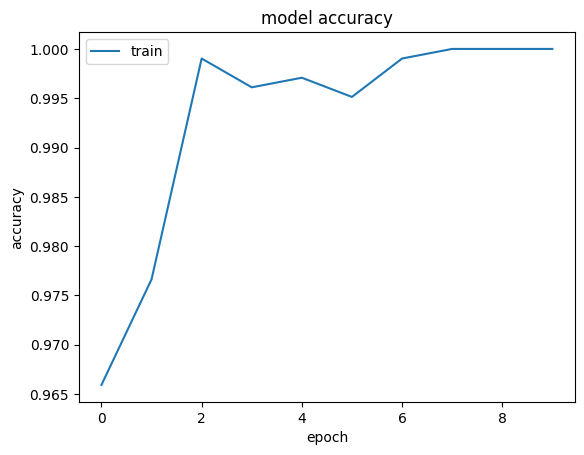

In [10]:
epochs = 10 
hist = model.fit(x_dataset, 
    y_dataset, 
    epochs= epochs, 
    validation_data=(x_test, y_test), 
)
plot_hist(hist)